In [25]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math

In [26]:
# scenarioname = "Strategic_Reserve"
# selected_scenarios = ["noSR", "strategic_reserve_7", "strategic_reserve_15"]

# selected_scenarios = ["iteration1", "iteration2","iteration3","iteration4", "iteration5","iteration6","iteration7","iteration8","iteration9","iteration10"]
# selected_scenarios =["LowRES_(2010)","medianRES_(2004)","highRES_(1990)"] 

# scenarioname = "NL_Capacity_subscription"
# selected_scenarios = ["EOM" , "CS_fix_WTP" , "CS_lower_WTP", "CS_89", "CS_97" , "CS_97_weather_years","CS_y_1"] 
# scenarioname = "comparisonfinal2"
# selected_scenarios = ["EOM","CM", "LTCM", "CS_fix", "CS",  "SRy"]
# scenarioname = "comparisonSRyears"
# selected_scenarios = ["EOM", "SR1300",  "SRy_4"] 
# scenarioname = "comparisonSR4"
# selected_scenarios = ["EOM", "SR143_15", "SR1390_15",  "SR1499_15"]  	
# scenarioname = "comparisonCM3"
# selected_scenarios = ["EOM", "CM_ES_VRES", "CM_ES",  "CM", "LTCM"]  
# scenarioname = "comparisonCS2"
# selected_scenarios = ["CS_fixprice_nochangeVol", "CS_fixprice_changeVol" ,
#                      "CS_changeprice_nochangeVol", "CS_changeprice_changeVol"]
# scenarioname = "comparisonCS3"
# selected_scenarios = ["EOM", "CS_fixprice_changeVol" ,"CS_fixprice_changeVol_linear", 
#                       "CS_changeprice_nochangeVol", "CS_changeprice_changeVol"]
# name = "ALL"
# scenarioname = "comparisonALL"
# selected_scenarios = ["EOM", "CM", "CS_fixprice_changeVol","SR143_15"]
# scenarioname = "comparisonCM3"
# selected_scenarios = ["EOM", "CM_ES_VRES", "CM_ES",  "CM", "LTCM"]  
# scenarioname = "comparisonCM4"
# selected_scenarios = ["EOM", "CM_ES_VRES", "CM_lowVol","LTCM_ES_VRES","LTCM"]  
# scenarioname = "comparisonSR4"
# selected_scenarios = ["EOM", "SR143_15", "SR1390_15",  "SR1390_20", "SR1499_15"]scenarioname = "comparisonSR4"
scenarioname = "comparisonCS4"
selected_scenarios = [ "EOM", "CS_fixprice_changeVol", "CS_fixprice_changeVol_linear",
                  "CS_changeprice_nochangeVol", "CS_changeprice_changeVol", "CS_no_inertia"]
name = "CS"

# name = "SR"
# scenarioname = "comparisonSR_5"
# selected_scenarios = ["SR1390_15","SR_distributed_plants", "SR_distr_plants_acceptnewer"]
# name = "CM"
# scenarioname = "comparisonSR_CM_vres_es"
# selected_scenarios = ["CM_ES_VRES","CM_ES_VRES_ungroupedplants", "CM_ES_VRES_ungrouped_distributedplants"]



CRM = []
isSR = []
for i in selected_scenarios: 
    if  any(x in i for x in ["capacity_market" ,  "CM", "CS"]):
        CRM.append("CM")      
    elif  any(x in i for x in [ "strategic_reserve", "SR"]):
        CRM.append("SR")
        isSR.append(i)
    else:
        CRM.append("EOM")

#selected_scenarios = ["noSR", "Strategic_Reserve_5_1500","Strategic_Reserve_10_1500","Strategic_Reserve_15_1500"]

In [27]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "Comparison_"+ scenarioname )
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)
    
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen_turbine": "darkred",
    "hydrogen_CHP": "indianred",
    "hydrogen_combined_cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}    

In [28]:
CM_total_costs_data = pd.read_excel(path_to_results, sheet_name='CM_total_costs', index_col=0) # costs in EUR
VRES_data = pd.read_excel(path_to_results, sheet_name='VRES', index_col=0)
SR_operator_data = pd.read_excel(path_to_results, sheet_name='SR', index_col=0)
CRM_costs_data = pd.read_excel(path_to_results, sheet_name='CRM', index_col=0) # costs in Eur/MWh
CM_capacity_data = pd.read_excel(path_to_results, sheet_name='CM_capacity', header=[0,1], index_col=0)
CM_clearing_price_data = pd.read_excel(path_to_results, sheet_name='CM_clearing_price', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
subscribedConsumers_data = pd.read_excel(path_to_results, sheet_name='subscribedCons', index_col=0)
allsubscribedConsumers_data = pd.read_excel(path_to_results, sheet_name='consumers', index_col=0)
costs_to_society_data = pd.read_excel(path_to_results, sheet_name='costs_to_society', index_col=0)

In [29]:
# CM_capacity_data_all = pd.melt(CM_capacity_data.reset_index(),id_vars=[( 'index')])
# CM_capacity_data_all.columns = ['index','technology', 'scenario_name', 'MW']
# sns.lineplot(x = "index", y="MW",  hue = "technology", style="scenario_name",
#              data=CM_capacity_data_all, 
#             # palette=colors
#            ).set(xlabel='simulation years', ylabel='Average NPV (r = 0%) [Eur]')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))

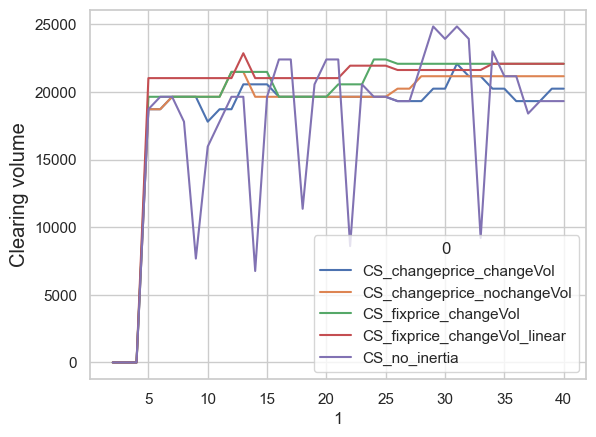

In [30]:
result = CM_capacity_data.groupby(level=1, axis=1).sum()
result.plot()
axs1 =plt.ylabel('Clearing volume', fontsize='large')
fig26 = axs1.get_figure()
fig26.savefig(path_to_plots + '/' + 'Clearing Volume'+ name  + '.png', bbox_inches='tight', dpi=300)

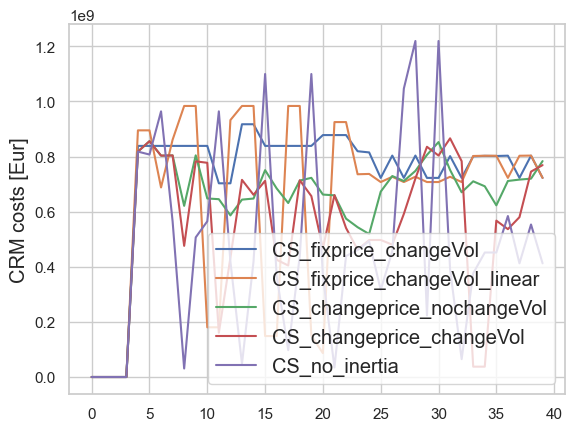

In [31]:
axs1 = CM_total_costs_data.plot()
plt.ylabel('CRM costs [Eur]', fontsize='large')
plt.legend(fontsize='large')
fig26 = axs1.get_figure()
fig26.savefig(path_to_plots + '/' + 'CRM total costs'+ name  + '.png', bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Electricity Prices[Eur/Mwh]')

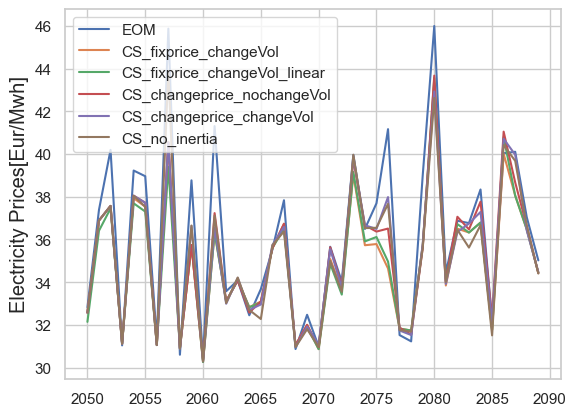

In [32]:
ElectricityPrices_data.plot()
plt.ylabel('Electricity Prices[Eur/Mwh]', fontsize='large')

In [33]:
for column_name, series in ElectricityPrices_data.items():
    if column_name not in SR_operator_data.columns:
        SR_operator_data[column_name] = 0
        

In [34]:
costs_to_consumers = pd.DataFrame()
CRM_costs_data.index = ElectricityPrices_data.index
col_num = 0 
for crm in CRM:
    name = ElectricityPrices_data.columns[col_num]
    if crm in ["CM", "CS"]: 
        print(name)
        costs_to_consumers[name] =  CRM_costs_data[name] + ElectricityPrices_data[name] 
    elif crm == "SR": 
        SR_operator_data.index = ElectricityPrices_data.index
        costs_to_consumers[name] = ElectricityPrices_data[name] - SR_operator_data[name] + CRM_costs_data[name]
    else:
        costs_to_consumers[name] =   ElectricityPrices_data[name]
    col_num = col_num + 1  
    

CS_fixprice_changeVol
CS_fixprice_changeVol_linear
CS_changeprice_nochangeVol
CS_changeprice_changeVol
CS_no_inertia


In [35]:
if "CS" in CRM: 
    ax8 = subscribedConsumers_data[["CS_fix", "CS"]].plot()
    plt.ylabel('Subscribed consumers %', fontsize='large')
    plt.axhline(y=.89, color='g', linestyle='--', label='Maximum subscribed consumers')
    plt.legend(fontsize='large')
    fig8 = ax8.get_figure()
    fig8.savefig(path_to_plots + '/' + 'subscribed consumers'+ name  + '.png', bbox_inches='tight', dpi=300)

In [36]:
if "CS" in CRM: 
    ax8 = allsubscribedConsumers_data[["CS_fix", "CS"]].plot()
    plt.ylabel('Subscribed consumers %', fontsize='large')
    plt.axhline(y=.89, color='g', linestyle='--', label='Maximum subscribed consumers')
    plt.legend(fontsize='large')
    fig8 = ax8.get_figure()
    fig8.savefig(path_to_plots + '/' + 'all subscribed consumers'+ name  + '.png', bbox_inches='tight', dpi=300)

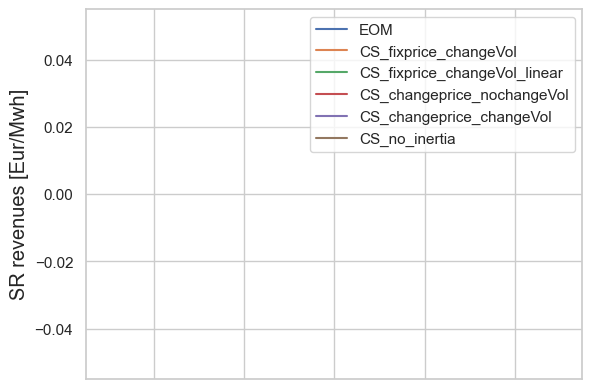

In [37]:
ax1 = SR_operator_data.plot()
plt.ylabel('SR revenues [Eur/Mwh]', fontsize='large')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'SR revenues.png', bbox_inches='tight', dpi=300)


In [38]:
if len(isSR)>0: 
    extra_costs = + SR_operator_data  - CRM_costs_data
    axs1 = extra_costs[isSR].plot()
    plt.ylabel('SR total costs - revenues[Eur/Mwh]', fontsize='large')
    fig26 = axs1.get_figure()
    fig26.savefig(path_to_plots + '/' + 'SRextracosts.png', bbox_inches='tight', dpi=300)
    axs1 = sns.catplot( data=pd.melt(extra_costs[isSR]), x="variable", y="value",  kind="box")
    plt.xlabel('', fontsize='large')
    plt.ylabel('Extra costs [Eur/Mwh]', fontsize='large')
    plt.tight_layout()
    plt.xticks(rotation=20, size = 15)
    axs1.savefig(path_to_plots + '/' + 'extra_costs.png', bbox_inches='tight', dpi=300)

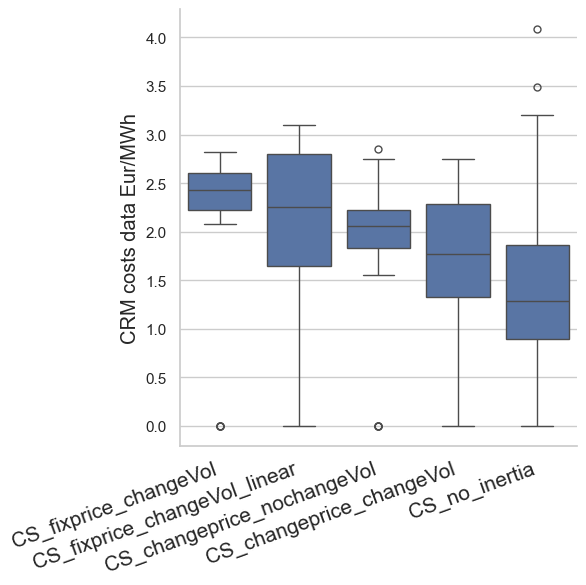

In [39]:
axs1 = sns.catplot( data=pd.melt(CRM_costs_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('CRM costs data Eur/MWh', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15, ha="right")

axs1.savefig(path_to_plots + '/' + 'CRM_costs_data'+ name  + '.png', bbox_inches='tight', dpi=300)


In [40]:
if len(isSR)>0: 
    axs1 = sns.catplot( data=pd.melt(+SR_operator_data), x="variable", y="value",  kind="box")
    plt.xlabel('', fontsize='large')
    plt.ylabel('SR revenues ', fontsize='large')
    plt.tight_layout()
    plt.xticks(rotation=90, size = 15)
    axs1.savefig(path_to_plots + '/' + 'SR_revenues.png', bbox_inches='tight', dpi=300)

In [41]:
merged_df = pd.DataFrame()
melted_elecprices = pd.melt(ElectricityPrices_data)

melted_elecprices['description'] = "Wholesale market"
melted_elecprices_withSR = pd.melt(costs_to_consumers)
melted_elecprices_withSR['description'] = "with CRM costs"
merged_df = pd.concat([melted_elecprices, melted_elecprices_withSR], ignore_index=True)


<Figure size 100x1000 with 0 Axes>

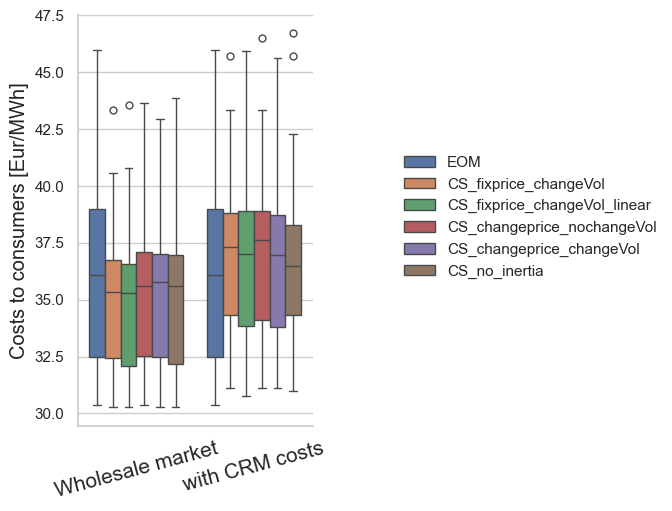

In [42]:
plt.figure(figsize=(1, 10)) 
axs1 = sns.catplot( data=merged_df, x="description", y="value",  kind="box", hue = "variable", 
                   height=5, aspect=0.76, legend = True)

plt.xlabel('', fontsize='large')
plt.ylabel('Costs to consumers [Eur/MWh]', fontsize='large')
#plt.tight_layout()
plt.xticks(rotation=15, size = 15)
sns.move_legend(axs1, "upper left",bbox_to_anchor=(0.7, 0.7), title=None)

axs1.savefig(path_to_plots + '/' + 'costs_consumers_withSR.png', bbox_inches='tight', dpi=300)

<Figure size 100x1000 with 0 Axes>

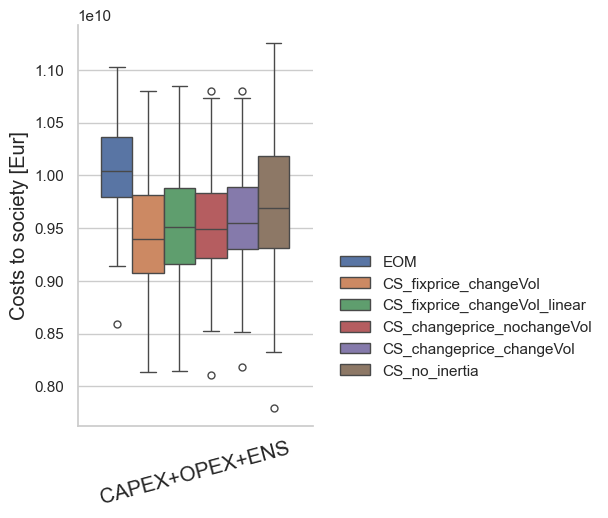

In [43]:
plt.figure(figsize=(1, 10)) 
melted_costs_to_society = pd.melt(costs_to_society_data)
melted_costs_to_society['description'] = "CAPEX+OPEX+ENS"
axs1 = sns.catplot( data=melted_costs_to_society, x="description", y="value",  kind="box", hue = "variable", 
                   height=5, aspect=0.76, legend = True)

plt.xlabel('', fontsize='large')
plt.ylabel('Costs to society [Eur]', fontsize='large')
# plt.tight_layout()
plt.xticks(rotation=15, size = 15)
sns.move_legend(axs1, "upper left",bbox_to_anchor=(0.6, 0.5), title=None)

axs1.savefig(path_to_plots + '/' + 'Costs_to_society.png', bbox_inches='tight', dpi=300)

In [44]:
if len(isSR)>0: 
    extra_costs_df = pd.DataFrame()
    melted_CRM_costs = pd.melt(-CRM_costs_data)
    melted_SR_operator_data= pd.melt(SR_operator_data)
    melted_total_costs= pd.melt(extra_costs)

    melted_CRM_costs['description'] = "costs"
    melted_SR_operator_data['description'] = "revenues"
    melted_total_costs['description'] = "total costs"
    merged_extra_costs = pd.concat([ melted_CRM_costs, melted_SR_operator_data, melted_total_costs], ignore_index=True)
    
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    shifted_colors = default_colors[1:] + default_colors[:1]
    custom_palette = sns.color_palette(shifted_colors)
    # #merged_extra_costs.loc[merged_extra_costs["variable"] == isSR]
    # [merged_extra_costs["variable"] in isSR]
    merged_extra_costs = merged_extra_costs[merged_extra_costs['variable'].isin(isSR)]

In [45]:

# fig, ax = plt.subplots(figsize=(2, 6))
if len(isSR)>0: 
    axs1 =sns.catplot( data=merged_extra_costs, x="description", y="value",  kind="box" ,hue = "variable", palette=custom_palette,
               height=5, aspect=1, legend=True)
    plt.xlabel('', fontsize='large')
    plt.ylabel('Strategic Reserve Costs [Eur/MWh]', fontsize='large')
    plt.tight_layout()
    plt.xticks(rotation=20, size = 15)
    sns.move_legend( axs1, "lower left", bbox_to_anchor=(1,0.1), title=None)
    #sns.move_legend(axs1, "upper center",bbox_to_anchor=(.5, 1.), title=None)
    axs1.savefig(path_to_plots + '/' + 'extra_costs.png', bbox_inches='tight', dpi=300)

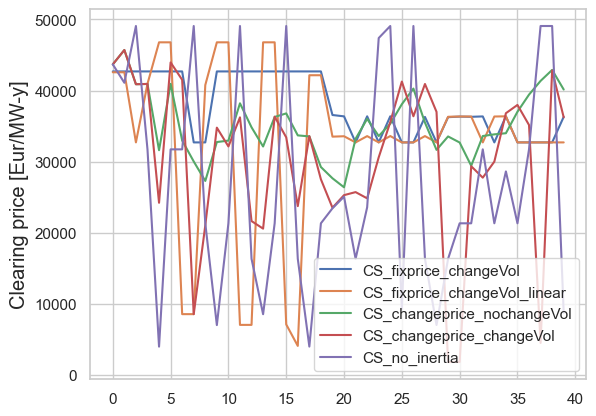

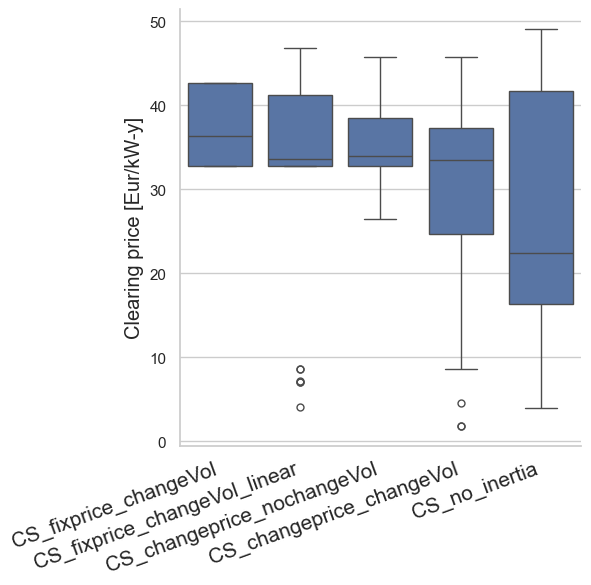

In [46]:
if len(CM_clearing_price_data)>0:
    CM_clearing_price_data.plot()
    axs1 =plt.ylabel('Clearing price [Eur/MW-y]', fontsize='large')
    fig26 = axs1.get_figure()
    fig26.savefig(path_to_plots + '/' + 'Clearing Market'+ name  + '.png', bbox_inches='tight', dpi=300)
    
    CM_clearing_price_data = CM_clearing_price_data/1000
    axs1 = sns.catplot( data=pd.melt(CM_clearing_price_data), x="variable", y="value",  kind="box")
    plt.xlabel('', fontsize='large')
    plt.ylabel('Clearing price [Eur/kW-y]', fontsize='large')
    plt.tight_layout()
    plt.xticks(rotation=20, size = 15, ha="right")
    axs1.savefig(path_to_plots + '/' + 'CM_clearing_price_data'+ name  + '.png', bbox_inches='tight', dpi=300)

In [47]:
totalconsumersmax =pd.read_excel("C:\\toolbox-amiris-emlab\\data\\EMLABparameters.xlsx", 
                                 sheet_name='CapacitySubscriptionConsumer', index_col=0, usecols="A,C")

totalconsumersmax

,max_subscribed_percentage
Name,
public sector and transport,0.13
commercial and service sector,0.13
industry,0.33
household other,0.09
household city center,0.21
NaN,NaN
NaN,NaN


In [48]:
consumers = pd.read_excel(path_to_results, sheet_name='consumers',  header=[0,1], index_col=0)
if len(consumers)> 0:
    totalconsumers = consumers.mean().to_frame()
    sns.set_palette("deep")

    # plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left" )
    ax = sns.barplot(totalconsumers, x="technology", y=0, hue="scenario_name")

    plt.ylabel('Average subscribed share %', fontsize='medium')
    plt.xlabel('Consumer group', fontsize='medium')

    plt.xticks(rotation=20, size = 15, ha="right")
    plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(0.6, 0.95))
    fig26 = ax.get_figure()
    fig26.savefig(path_to_plots + '/' + 'consumers_inscribed'+ name  + '.png', bbox_inches='tight', dpi=300)
    total_subscribed = consumers.groupby(level=1, axis=1).sum()
    total_subscribed.plot()
    plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(0.9, 0.3))

ValueError: Could not interpret value `technology` for `x`. An entry with this name does not appear in `data`.